In [277]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Reading and Understanding the data

In [278]:
leads=pd.read_csv(r'C:\Users\Sim\Downloads\Lead Scoring Assignment\Leads.csv')

## a. Information about data

In [279]:
leads.shape

(9240, 37)

In [280]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [281]:
leads.describe()
#as we can see the data consist of very few numerical variable

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2 : Data Cleaning

## This step involves reading and replacing the null values checking for the data redundancy and treating them

In [282]:
#looking at the data we have "Select" in the columns so we can replace it with simple NAN
leads = leads.replace('Select', np.nan)

In [283]:
#checking the null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [284]:
#checking percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [285]:
# dropping the columns more than 60% NAN values
leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>60)].columns, axis=1)

In [286]:
#checking percentage of missing values in each column, we see that lead quality as 52 percent of missing and by
#looking in data dictionary we cannot drop it as it is looking important column so we will impute the missing value in it
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# Step 3 : Checking unique values in each columns

In [287]:
#checking the lead_quality
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

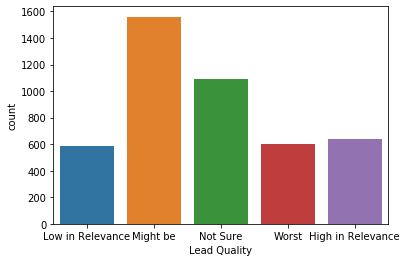

In [288]:
sns.countplot(leads['Lead Quality'])

In [289]:
# we can impute the missing values with NOT SURE 
leads['Lead Quality'].replace(np.nan,'Not Sure',inplace=True)

In [290]:
leads['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

### Dropping the unnecessary columns 

In [291]:
# now dropping the Asymmetrique columns as they are meaningless
leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [292]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

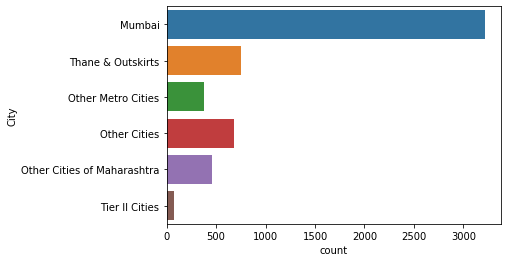

In [293]:
#checking unique values in city column
sns.countplot(y=leads['City'])

In [294]:
leads['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [295]:
#replacing the nan value with 'mumbai' as it covers 60% of the data
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [296]:
#checking for unique values in specialization
leads['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

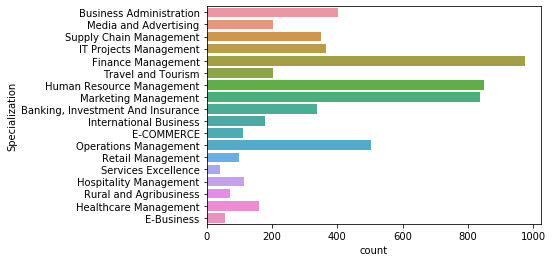

In [297]:
sns.countplot(y=leads['Specialization'])

In [298]:
#it may be the case that the list as missing his or her Specialization so we will impute the NAN by 'NOT LISTED'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'NOT LISTED')

In [299]:
#check for null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [300]:
#checking for unique values in tags
leads['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

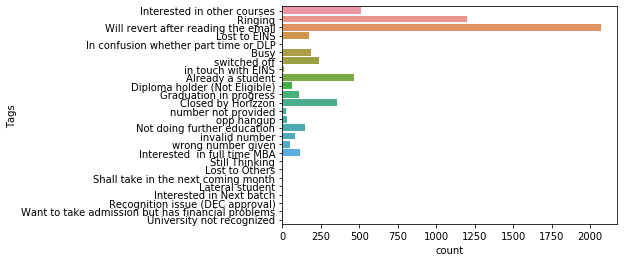

In [301]:
sns.countplot(y=leads['Tags'])

In [302]:
#around 35 percent values are 'Will revert after reading the email' so imputing it
leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

In [303]:
#checking for unique values in 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

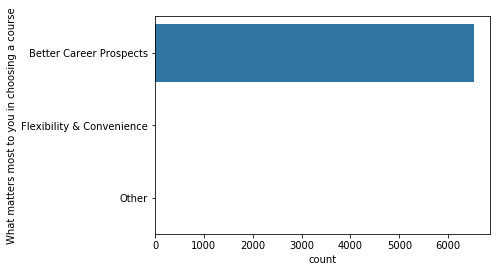

In [304]:
sns.countplot(y=leads['What matters most to you in choosing a course'])

In [305]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [306]:
#check for % of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [307]:
#checking for unique values in What is your current occupation
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [308]:
#repalcing the nulll values with 'Unemployes' as it covers 60% of the data
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [309]:
#checking for unique values in 'Country'
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [310]:
#replacing nan values by "India"
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [311]:
#check for % of null
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [312]:
# as very less percentage missing are remaining lets drop them
leads.dropna(inplace = True)

# Step 4 : Exploratory data analysis

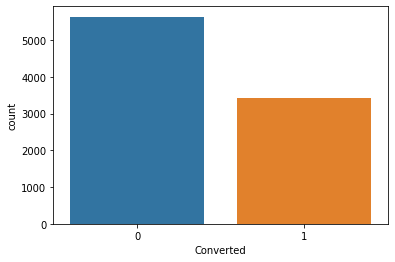

In [313]:
#comparing the leads who are converted (ie 1)with the leads who are not converted (ie 0)
sns.countplot(leads['Converted'])

In [314]:
#checkiing the leads percentage who are successfully converted
round(100*(sum(leads['Converted'])/len(leads.index)),2)

37.86

## 4.a Check for convergence 

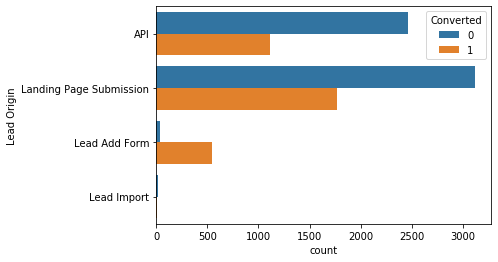

In [315]:
#a.Lead Origin v/s Converted
sns.countplot(y = "Lead Origin", hue = "Converted", data = leads)

If the lead origin is API and Landing page submission we can see significant contiribution to leads But the lead converted are less than non leads. So we have to focus on these two lead origin more .

if the lead origin is Lead Add Form then probabability that they will become lead is very high.

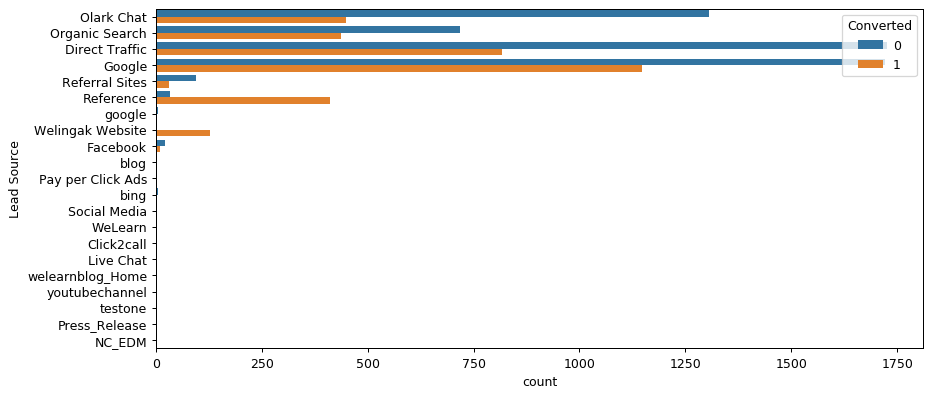

In [316]:
#b. Lead_Source V/s Converted
plt.figure(figsize=(11, 5), dpi=90)
sns.countplot(y="Lead Source", hue = "Converted", data = leads)

Direct Traffic and Google is generating high amount of lead but the non leads are more so focus should be on direct lead and google.
If the lead source is reference then the prob of becoming lead is very high.
Olark chat and organic search also contribute significant leads.

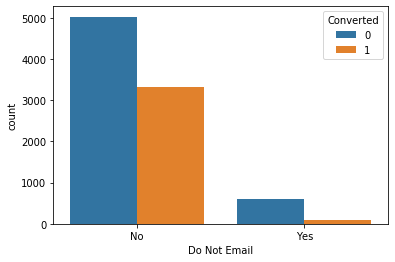

In [317]:
#c. Do_not_email v/s converted
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)

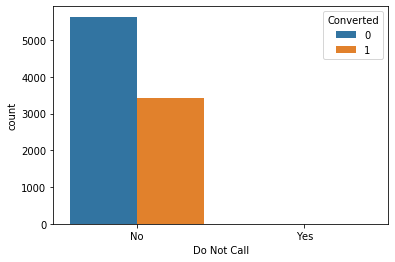

In [318]:
#d. Do_not_call v/s converted
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads)

## 4.b check for numerical varriable and treating outliers

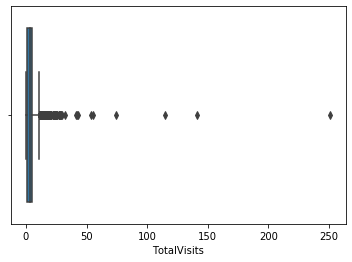

In [319]:
#Total visit is numerical column so we will plot boxplot for it
sns.boxplot(leads['TotalVisits'])

In [320]:
#as we can see so many outliers in this 
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [321]:
#removing outliers using IQR method
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads= leads[~((leads['TotalVisits'] < (Q1 - 1.5 * IQR)) |(leads['TotalVisits'] > (Q3 + 1.5 * IQR)))]

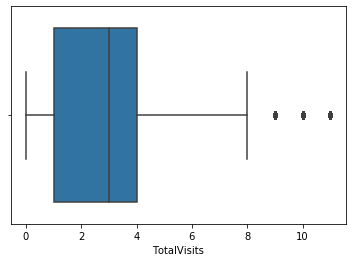

In [322]:
sns.boxplot(leads['TotalVisits'])

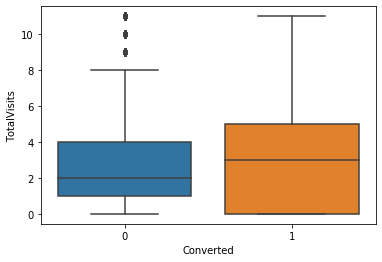

In [323]:
# e. TotalVisits v/s Converted
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

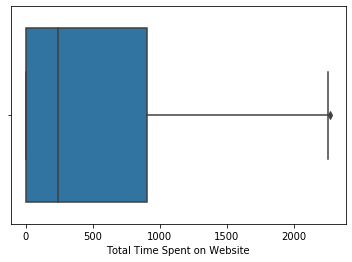

In [324]:
#Check for outliers for Total Time Spent on Website
sns.boxplot(leads['Total Time Spent on Website'])

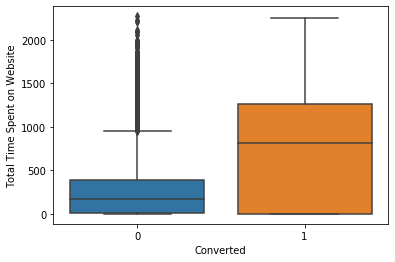

In [325]:
#f.'Total Time Spent on Website v/s 'Converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

higher time spent will likely to be converted into lead

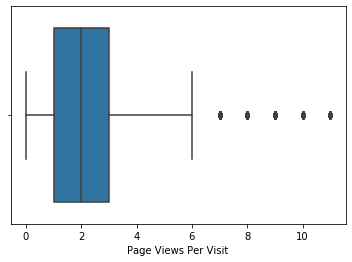

In [326]:
#check for outliers for Page Views Per Visit'
sns.boxplot(leads['Page Views Per Visit'])

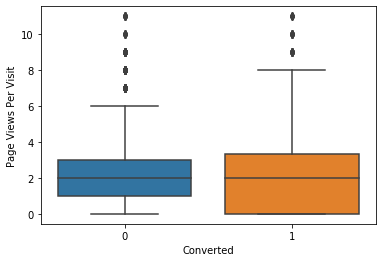

In [327]:
#g.'Page Views Per Visit' v/s 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

nothing can be concluded

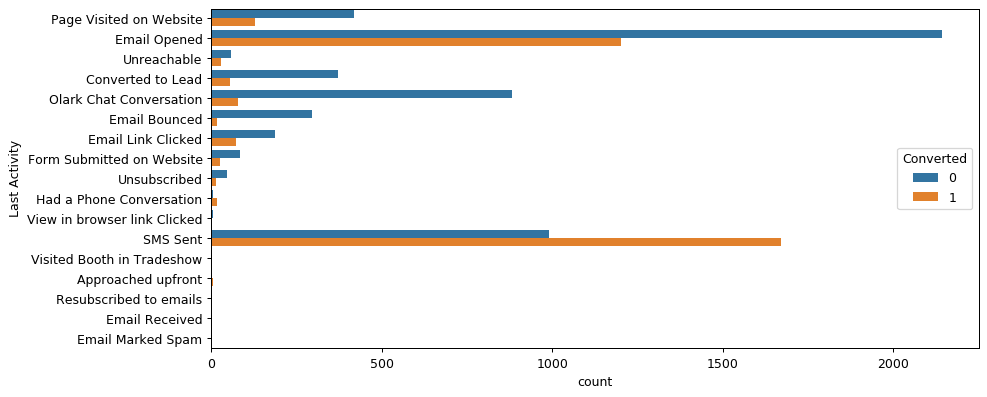

In [328]:
#h."Last Activity" v/s converted
plt.figure(figsize=(11, 5), dpi=90)
sns.countplot(y="Last Activity", hue = "Converted", data = leads)

If the last activity is Email Opened then the lead is higher.

if the last activity is SMS sent then the probabilty that it is going to be lead is high

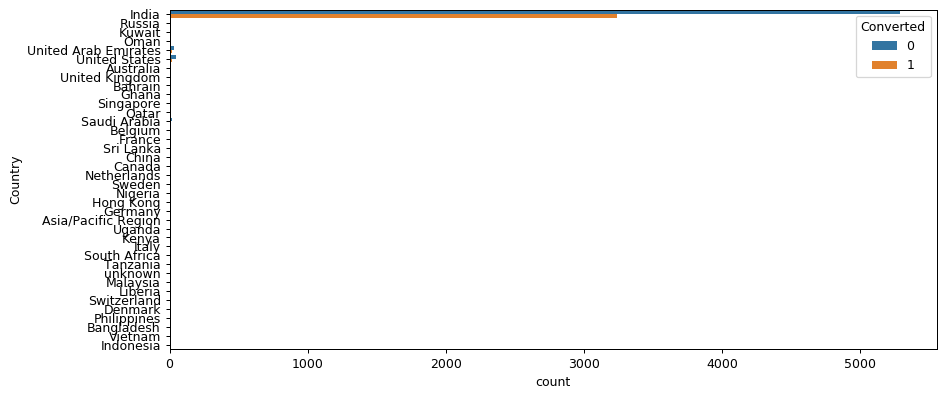

In [329]:
#i. Country v/s converted
plt.figure(figsize=(11, 5), dpi=90)
sns.countplot(y = "Country", hue = "Converted", data = leads)

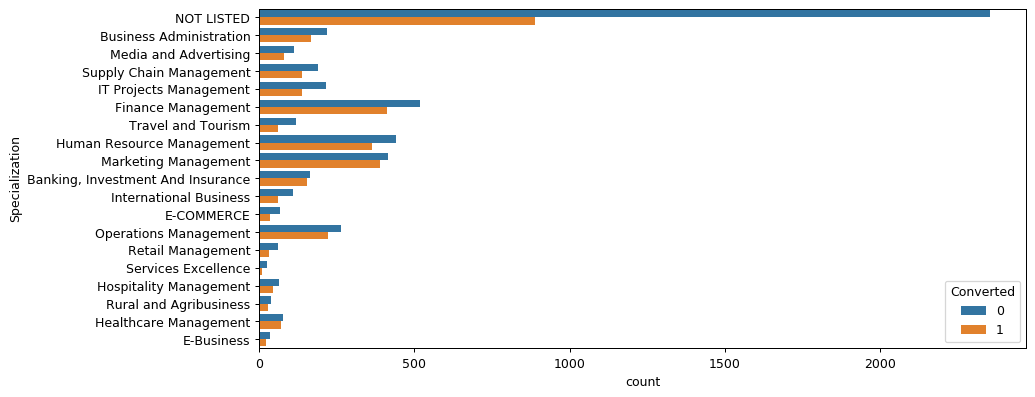

In [330]:
#j. Specialization v/s converted
plt.figure(figsize=(11, 5), dpi=90)
sns.countplot(y = "Specialization", hue = "Converted", data = leads)

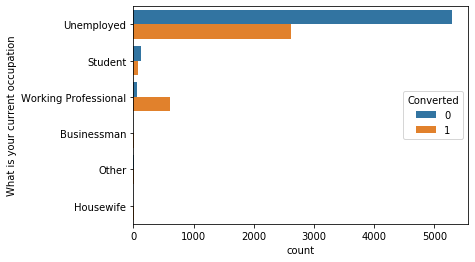

In [331]:
#k."What is your current occupation" v/s converted
sns.countplot(y = "What is your current occupation", hue = "Converted", data = leads)

Unemployed leads are the most in numbers

If the occupation is Working Professional then the probabilty that it is going to be lead is high

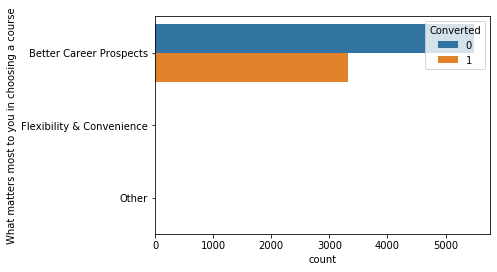

In [332]:
#l. "What matters most to you in choosing a course" v/s converted
sns.countplot(y = "What matters most to you in choosing a course", hue = "Converted", data = leads)

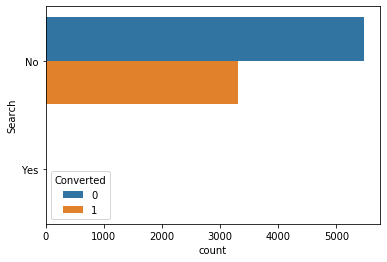

In [333]:
#m. search v/s converted
sns.countplot(y = "Search", hue = "Converted", data = leads)

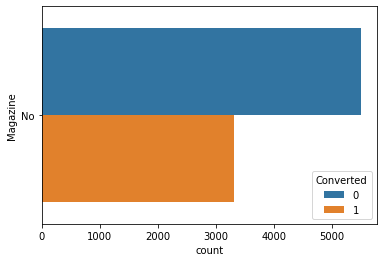

In [334]:
#n.magzine v/s converted
sns.countplot(y = "Magazine", hue = "Converted", data = leads)

In [335]:
#check for % of null
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

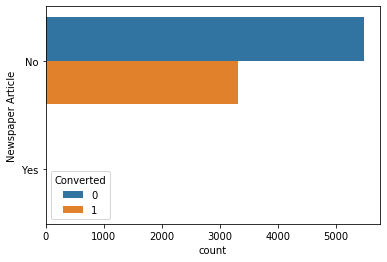

In [336]:
#o."Newspaper Article" v/s converted
sns.countplot(y = "Newspaper Article", hue = "Converted", data = leads)

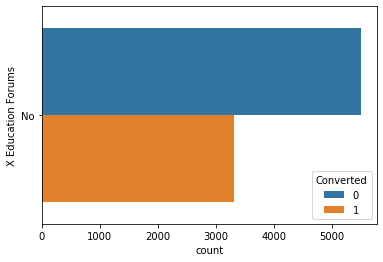

In [337]:
#q."X Education Forums" v/s converted
sns.countplot(y = "X Education Forums", hue = "Converted", data = leads)

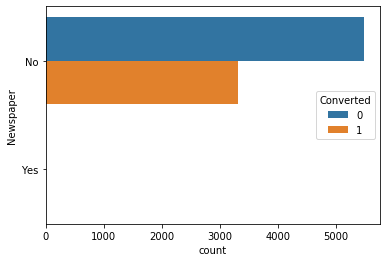

In [338]:
#r."Newspaper" v/s converted
sns.countplot(y = "Newspaper", hue = "Converted", data = leads)

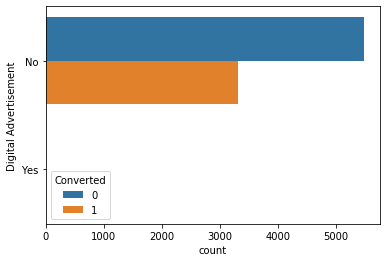

In [339]:
#s. "Digital Advertisement" v/s converted
sns.countplot(y = "Digital Advertisement", hue = "Converted", data = leads)

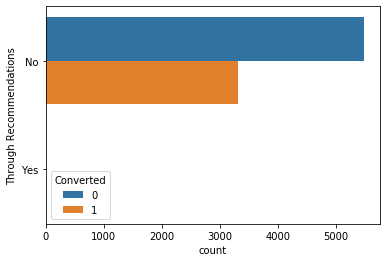

In [340]:
#t. "Through Recommendations" v/s converted
sns.countplot(y = "Through Recommendations", hue = "Converted", data = leads)

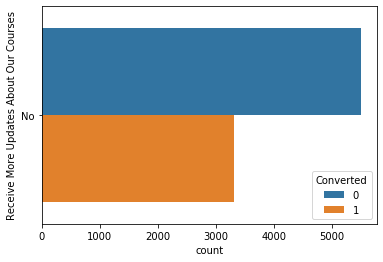

In [341]:
# u."Receive More Updates About Our Courses" V/S CONVERTED
sns.countplot(y = "Receive More Updates About Our Courses", hue = "Converted", data = leads)

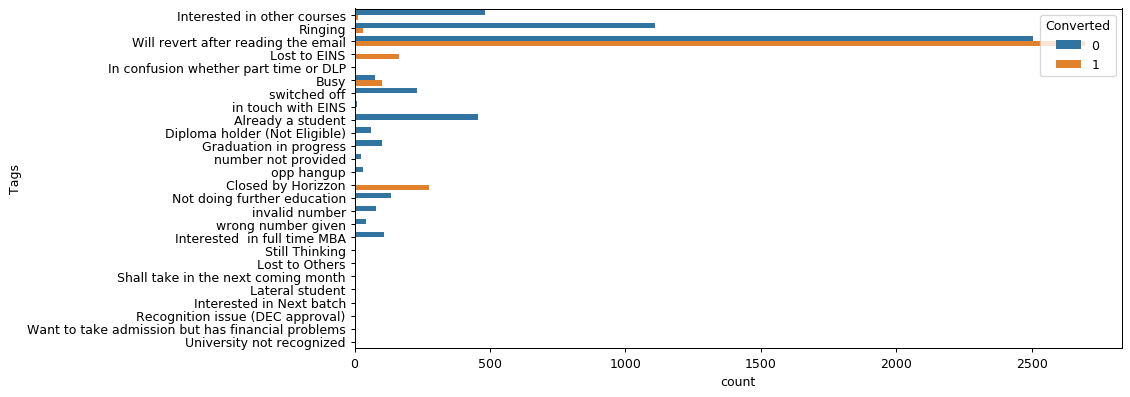

In [342]:
#V. tags v/s converted
plt.figure(figsize=(11, 5), dpi=90)
sns.countplot(y = "Tags", hue = "Converted", data = leads)

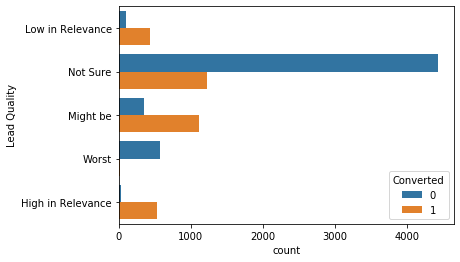

In [343]:
#w. lead_quality v/s  converted
sns.countplot(y = "Lead Quality", hue = "Converted", data = leads)

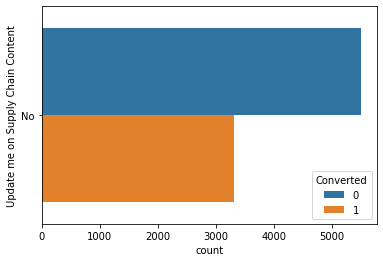

In [344]:
#x."Update me on Supply Chain Content" v/s converted
sns.countplot(y = "Update me on Supply Chain Content", hue = "Converted", data = leads)

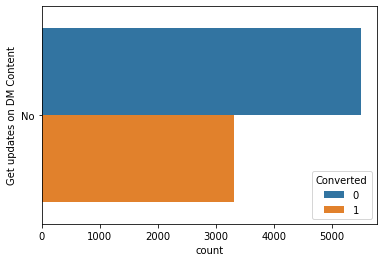

In [345]:
#y."Get updates on DM Content" v/s converted
sns.countplot(y = "Get updates on DM Content", hue = "Converted", data = leads)

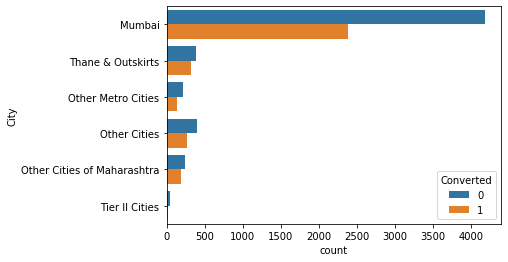

In [346]:
#z. city v/s converted
sns.countplot(y = "City", hue = "Converted", data = leads)

Most leads are from mumbai

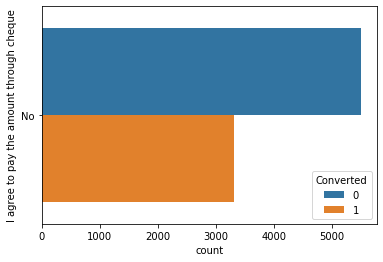

In [347]:
#z.a "I agree to pay the amount through cheque" v/s converted
sns.countplot(y = "I agree to pay the amount through cheque", hue = "Converted", data = leads)

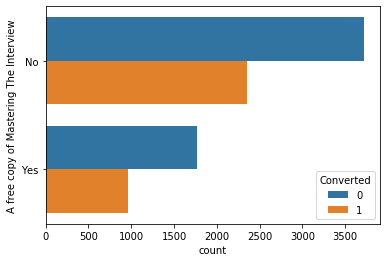

In [348]:
#z.b "A free copy of Mastering The Interview" v/s converted
sns.countplot(y = "A free copy of Mastering The Interview", hue = "Converted", data = leads)

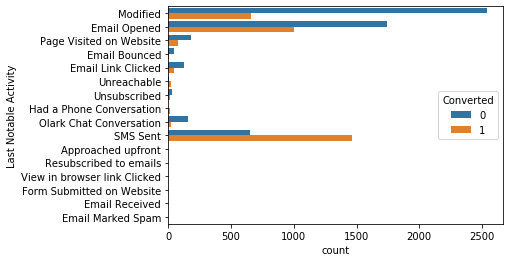

In [349]:
#z.c "Last Notable Activity" v/s converted
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = leads)

In [350]:
#some of the columns are giving useless information so dropping them
leads = leads.drop(['Lead Number','Country','I agree to pay the amount through cheque','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','A free copy of Mastering The Interview'],axis=1)

# Step 5 : Dummy varibale conversion


In [351]:
#converting categorical columns into dummy data
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [352]:
#converting binary variables 
varlist=['Do Not Email','Do Not Call']
leads[varlist] = leads[varlist].apply(lambda x:x.map({'Yes':1,'No':0}))

In [353]:
#concatenating dummy varibale data 
leads= pd.concat([leads,dummy], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [354]:
#dropping extra variables
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [355]:
#importing the model_selection
from sklearn.model_selection import train_test_split
X = leads.drop(['Prospect ID','Converted'], axis=1)

In [356]:
y = leads['Converted']

In [357]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6 : SCALING the data

In [358]:
#importing sklearn
from sklearn.preprocessing import StandardScaler

#creating instance
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\Sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sim\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
270,0,0,-1.151754,-0.873136,-1.159053,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2973,0,0,0.389921,-0.039830,0.881855,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2167,0,0,0.389921,-0.691023,-0.138599,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7033,1,0,-1.151754,-0.873136,-1.159053,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
651,0,0,-0.380917,-0.827148,-0.648826,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 7 : Model Building

In [359]:
### Checking the Converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.67457704099012

In [362]:
#importing statsmodel for model building
import statsmodels.api as sm

In [363]:
#building the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6164
Model:                            GLM   Df Residuals:                     6053
Model Family:                Binomial   Df Model:                          110
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 29 Feb 2020   Deviance:                          nan
Time:                        20:01:54   Pearson chi2:                 3.05e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   4.922e+15   7.72e+07   6.38e+07      0.000    4.92e+15    4.92e+15
Do Not Email                                           -1.713e+14    4.7e+06  -3.64e+07      0.000   -1.71e+14   -1.71e+14
Do Not Call                                             3.244e+15   6.79e+07   4.78e+07      0.000    3.24e+15    3.24e+15
TotalVisits                                             9.596e+13   1.53e+06   6.28e+07      0.000     9.6e+13     9.6e+13
Total Time Spent on Website                             2.902e+14   1.05e+06   2.77e+08      0.000     2.9e+14     2.9e+14
Page Views Per Visit                                   -9.547e+13   1.56e+06  -6.14e+07      0.000   -9.55e+13   -9.55e+13
Lead Origin_Landing Page Submission                    -2.474e+14   3.56e+06  -6.95e+07      0.000   -2.47e+14   -2.47e+14
Lead Origin_Lead Add Form                               4.459e+14   4.77e+07   9.35e+06      0.000    4.46e+14    4.46e+14
Lead Origin_Lead Import                                 4.597e+15   6.99e+07   6.58e+07      0.000     4.6e+15     4.6e+15
Lead Source_Direct Traffic                             -1.232e+14   6.26e+07  -1.97e+06      0.000   -1.23e+14   -1.23e+14
Lead Source_Facebook                                   -4.474e+15   9.23e+07  -4.85e+07      0.000   -4.47e+15   -4.47e+15
Lead Source_Google                                      1.189e+13   6.26e+07    1.9e+05      0.000    1.19e+13    1.19e+13
Lead Source_Live Chat                                   3.145e+15   7.85e+07      4e+07      0.000    3.14e+15    3.14e+15
Lead Source_NC_EDM                                      4.055e+15   9.18e+07   4.42e+07      0.000    4.05e+15    4.05e+15
Lead Source_Olark Chat                                  2.344e+14   6.26e+07   3.75e+06      0.000    2.34e+14    2.34e+14
Lead Source_Organic Search                             -1.477e+13   6.26e+07  -2.36e+05      0.000   -1.48e+13   -1.48e+13
Lead Source_Pay per Click Ads                          -3.478e+15    9.2e+07  -3.78e+07      0.000   -3.48e+15   -3.48e+15
Lead Source_Press_Release                              -2.666e+15   9.23e+07  -2.89e+07      0.000   -2.67e+15   -2.67e+15
Lead Source_Reference                                   -8.28e+13   4.08e+07  -2.03e+06      0.000   -8.28e+13   -8.28e+13
Lead Source_Referral Sites                             -9.478e+13   6.31e+07   -1.5e+06      0.000   -9.48e+13   -9.48e+13
Lead Source_Social Media                                 113.1982   1.85e-06   6.11e+07      0.000     113.198     113.198
Lead Source_WeLearn                                    -7.423e+14    9.2e+07  -8.07e+06      0.000   -7.42e+14   -7.42e+14
Lead Sou

In [364]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
#creating instance
logreg = LogisticRegression()

#importing for RFE
from sklearn.feature_selection import RFE
#selecting no of features = 15
rfe = RFE(logreg, 15)      
#fitting the data
rfe = rfe.fit(X_train, y_train)

C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [365]:
#retreiving columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [366]:
#adding constant
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#getting the summary
res.summary()

C:\Users\Sim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6164
Model:                            GLM   Df Residuals:                     6148
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.9
Date:                Sat, 29 Feb 2020   Deviance:                       2989.7
Time:                        20:02:14   Pearson chi2:                 2.25e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1385      0.344     -0.403      0.687      -0.812       0.535
Lead Source_Welingak Website                   4.7602      1.018      4.678      0.000       2.766       6.755
Last Activity_Olark Chat Conversation         -1.4031      0.202     -6.939      0.000      -1.799      -1.007
What is your current occupation_Student       -1.9805      0.499     -3.966      0.000      -2.959      -1.002
What is your current occupation_Unemployed    -1.7486      0.310     -5.636      0.000      -2.357      -1.140
Tags_Busy                                      4.2193      0.332     12.703      0.000       3.568       4.870
Tags_Closed by Horizzon                        7.9745      0.764     10.434      0.000       6.477       9.473
Tags_Lost to EINS                              9.0418      0.759     11.906      0.000       7.553      10.530
Tags_Ringing                                  -1.6354      0.335     -4.877      0.000      -2.293      -0.978
Tags_Will revert after reading the email       3.9361      0.238     16.514      0.000       3.469       4.403
Tags_in touch with EINS                        3.5659      1.027      3.472      0.001       1.553       5.579
Tags_invalid number                          -22.4179    1.4e+04     -0.002      0.999   -2.75e+04    2.75e+04
Tags_switched off                             -3.2213      0.772     -4.175      0.000      -4.734      -1.709
Lead Quality_Not Sure                         -3.4779      0.137    -25.303      0.000      -3.747      -3.208
Lead Quality_Worst                            -3.9037      0.810     -4.817      0.000      -5.492      -2.315
Last Notable Activity_SMS Sent                 2.6820      0.123     21.863      0.000       2.442       2.922
==============================================================================================================
"""

In [367]:
#as the p value of Tags_invalid number is high so removing it
colv2 = col.drop('Tags_invalid number')

In [368]:
#building the model after removing Tags_invalid_number
X_train_sm = sm.add_constant(X_train[colv2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6164
Model:                            GLM   Df Residuals:                     6149
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.4
Date:                Sat, 29 Feb 2020   Deviance:                       3000.9
Time:                        20:02:27   Pearson chi2:                 2.23e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.2587      0.347     -0.745      0.456      -0.939       0.422
Lead Source_Welingak Website                   4.7563      1.018      4.674      0.000       2.762       6.751
Last Activity_Olark Chat Conversation         -1.4056      0.202     -6.949      0.000      -1.802      -1.009
What is your current occupation_Student       -1.9959      0.504     -3.956      0.000      -2.985      -1.007
What is your current occupation_Unemployed    -1.7908      0.314     -5.711      0.000      -2.405      -1.176
Tags_Busy                                      4.3895      0.332     13.230      0.000       3.739       5.040
Tags_Closed by Horizzon                        8.1321      0.765     10.631      0.000       6.633       9.631
Tags_Lost to EINS                              9.2021      0.760     12.104      0.000       7.712      10.692
Tags_Ringing                                  -1.4438      0.334     -4.326      0.000      -2.098      -0.790
Tags_Will revert after reading the email       4.0967      0.240     17.081      0.000       3.627       4.567
Tags_in touch with EINS                        3.7295      1.025      3.640      0.000       1.721       5.738
Tags_switched off                             -3.0252      0.771     -3.925      0.000      -4.536      -1.515
Lead Quality_Not Sure                         -3.4688      0.137    -25.271      0.000      -3.738      -3.200
Lead Quality_Worst                            -3.9565      0.804     -4.920      0.000      -5.533      -2.380
Last Notable Activity_SMS Sent                 2.6451      0.121     21.847      0.000       2.408       2.882
==============================================================================================================
"""

In [369]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

270     0.978918
2973    0.194426
2167    0.029506
7033    0.997477
651     0.885671
623     0.885671
6605    0.002458
8123    0.772690
426     0.885671
4837    0.885671
dtype: float64

In [370]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97891781, 0.19442645, 0.02950614, 0.9974772 , 0.88567086,
       0.88567086, 0.00245797, 0.7726901 , 0.88567086, 0.88567086])

In [371]:
#creating a dataframe with actual values and predicted converted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.978918,270
1,0,0.194426,2973
2,0,0.029506,2167
3,1,0.997477,7033
4,1,0.885671,651


## 7.a Checking VIFs

In [372]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colv2].columns
vif['VIF'] = [variance_inflation_factor(X_train[colv2].values, i) for i in range(X_train[colv2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Student,1.20
10,Tags_switched off,1.18
4,Tags_Busy,1.17
5,Tags_Closed by Horizzon,1.13
6,Tags_Lost to EINS,1.07
0,Lead Source_Welingak Website,1.04
9,Tags_in touch with EINS,1.01
12,Lead Quality_Worst,0.57
1,Last Activity_Olark Chat Conversation,0.29
3,What is your current occupation_Unemployed,0.26


#### VIF values are low ie <5 so no modification is required

# Step 8: Plotting the ROC Curve

In [374]:
#plotting the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [375]:
#defining the roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

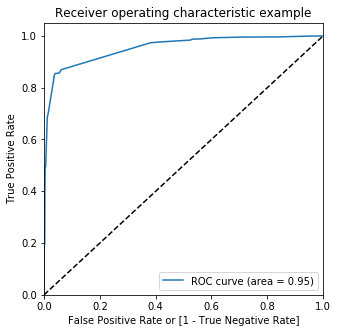

In [377]:
#graph
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Step 9 : Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [378]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.978918,270,1,1,1,1,1,1,1,1,1,1
1,0,0.194426,2973,1,1,0,0,0,0,0,0,0,0
2,0,0.029506,2167,1,0,0,0,0,0,0,0,0,0
3,1,0.997477,7033,1,1,1,1,1,1,1,1,1,1
4,1,0.885671,651,1,1,1,1,1,1,1,1,1,0


In [379]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376541  1.000000  0.000000
0.1   0.1  0.732966  0.976734  0.585740
0.2   0.2  0.913043  0.869453  0.939370
0.3   0.3  0.920019  0.855235  0.959147
0.4   0.4  0.920019  0.855235  0.959147
0.5   0.5  0.920993  0.854373  0.961228
0.6   0.6  0.920019  0.850065  0.962269
0.7   0.7  0.917262  0.839724  0.964091
0.8   0.8  0.878975  0.704007  0.984647
0.9   0.9  0.806619  0.495907  0.994275


## 9.a Graph accuracy sensitivity and specificity for various probabilities.

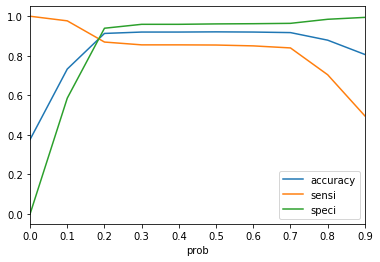

In [380]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [381]:
#Checking the predicted value
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,1,0.978918,270,1,1,1,1,1,1,1,1,1,1,1
1,0,0.194426,2973,1,1,0,0,0,0,0,0,0,0,0
2,0,0.029506,2167,1,0,0,0,0,0,0,0,0,0,0
3,1,0.997477,7033,1,1,1,1,1,1,1,1,1,1,1
4,1,0.885671,651,1,1,1,1,1,1,1,1,1,0,1


#### Assigning Lead Score in the train set

In [382]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x:round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
0,1,0.978918,270,1,1,1,1,1,1,1,1,1,1,1,98
1,0,0.194426,2973,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.029506,2167,1,0,0,0,0,0,0,0,0,0,0,3
3,1,0.997477,7033,1,1,1,1,1,1,1,1,1,1,1,100
4,1,0.885671,651,1,1,1,1,1,1,1,1,1,0,1,89


In [383]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.9130434782608695

In [384]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3610,  233],
       [ 303, 2018]], dtype=int64)

In [385]:
# ASSIGNING TP TN FP FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

## 9.b Calculating sensitivity and specitivity

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8694528220594572

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.9393702836325787

In [392]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.06062971636742129


In [393]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8964904486894714


In [394]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9225658062867366


# Step 9:  Making predictions on the test set

In [395]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

C:\Users\Sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sim\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3892,0,0,-1.151754,-0.873136,-1.159053,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7707,0,0,0.389921,1.891673,-0.138599,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7290,1,0,-0.380917,-0.492354,-0.138599,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6969,0,0,-0.380917,-0.860259,-0.138599,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3272,0,0,-1.151754,-0.873136,-1.159053,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [396]:
X_test = X_test[colv2]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3892,0,1,0,1,0,0,0,0,0,0,0,0,1,0
7707,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7290,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6969,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3272,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [397]:
X_test_sm = sm.add_constant(X_test)

C:\Users\Sim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [398]:
y_test_pred = res.predict(X_test_sm)

In [399]:
y_test_pred[:10]

3892    0.000604
7707    0.988873
7290    0.002458
6969    0.002458
3272    0.965603
5991    0.990918
6807    0.194426
5170    0.990918
4393    0.194426
742     0.194426
dtype: float64

In [400]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3892,0.000604
7707,0.988873
7290,0.002458
6969,0.002458
3272,0.965603


In [401]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3892,0
7707,1
7290,0
6969,0
3272,1


In [402]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [403]:
y_test_df.head()

,Converted,Prospect ID
3892,0,3892
7707,1,7707
7290,0,7290
6969,0,6969
3272,1,3272


In [404]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [405]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [406]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3892,0.000604
1,1,7707,0.988873
2,0,7290,0.002458
3,0,6969,0.002458
4,1,3272,0.965603


In [407]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [408]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

C:\Users\Sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [409]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [410]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3892,0,0.000604,0
1,7707,1,0.988873,1
2,7290,0,0.002458,0
3,6969,0,0.002458,0
4,3272,1,0.965603,1


In [411]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.905788876276958

In [412]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1521,  125],
       [ 124,  873]], dtype=int64)

In [413]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [414]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8756268806419257

In [415]:
# Let us calculate specificity
TN / float(TN+FP)

0.9240583232077765

# Conclusion: Assigning Lead Score in the test set

In [417]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x:round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3892,0,0.000604,0,0
1,7707,1,0.988873,1,99
2,7290,0,0.002458,0,0
3,6969,0,0.002458,0,0
4,3272,1,0.965603,1,97
